In [ ]:
import kagglehub
import os
import cv2
import numpy as np
from pathlib import Path
import yaml
import matplotlib.pyplot as plt
from Bdd100preprocessor import process_dataset, visualize_labels, compare_images

In [ ]:
# Download latest version, downloading and analyzing BDD100K dataset
path = kagglehub.dataset_download("paulmaxencebaraton/bdd100k-for-yolov5")

100%|██████████| 4.31G/4.31G [00:43<00:00, 108MB/s]


Extracting files...


In [7]:
print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/paulmaxencebaraton/bdd100k-for-yolov5/versions/2


In [8]:
# Verify the dataset structure
!ls {path}

bdd100k  bdd100k.pt


In [9]:
!ls {path}/bdd100k

dataset.yaml  images  labels


In [11]:
# Load and display dataset configuration
yaml_path = os.path.join(path, "bdd100k/dataset.yaml")
with open(yaml_path, 'r') as file:
    dataset_config = yaml.safe_load(file)
print("\nDataset Configuration:")
print(dataset_config)


Dataset Configuration:
{'names': ['person', 'rider', 'car', 'bus', 'truck', 'bike', 'motor', 'traffic_light', 'traffic sign', 'train'], 'nc': 10, 'path': 'C:\\Users\\Paul-Maxence Baraton\\OneDrive\\Documents\\TEAMAWARE\\datasets\\bdd100kv2', 'val': '.\\images\\val\\', 'train': '.\\images\\train\\'}


**Dataset Classes (10 total):**


person,
rider,
car,
bus,
truck,
bike,
motor,
traffic_light,
traffic sign,
train

In [12]:
# Display a sample of images and labels
print("\nSample of training images:")
!ls {os.path.join(path, "bdd100k/images/train")} | head -n 5


Sample of training images:
0000f77c-6257be58.jpg
0000f77c-62c2a288.jpg
0000f77c-cb820c98.jpg
0001542f-5ce3cf52.jpg
0001542f-7c670be8.jpg


In [13]:
print("\nSample of training labels:")
!ls {os.path.join(path, "bdd100k/labels/train")} | head -n 5


Sample of training labels:
0000f77c-6257be58.txt
0000f77c-62c2a288.txt
0000f77c-cb820c98.txt
0001542f-5ce3cf52.txt
0001542f-7c670be8.txt


In [14]:
# Count total number of images and labels
train_images = len(list(Path(os.path.join(path, "bdd100k/images/train")).glob('*.jpg')))
val_images = len(list(Path(os.path.join(path, "bdd100k/images/val")).glob('*.jpg')))
train_labels = len(list(Path(os.path.join(path, "bdd100k/labels/train")).glob('*.txt')))
val_labels = len(list(Path(os.path.join(path, "bdd100k/labels/val")).glob('*.txt')))


In [15]:
print(f"\nDataset Statistics:")
print(f"Training Images: {train_images}")
print(f"Validation Images: {val_images}")
print(f"Training Labels: {train_labels}")
print(f"Validation Labels: {val_labels}")


Dataset Statistics:
Training Images: 70000
Validation Images: 10000
Training Labels: 69863
Validation Labels: 10000


Dataset Size:


Training: 70,000 images (69,863 labels)

Validation: 10,000 images (10,000 labels)

Note: There's a small discrepancy (137 missing labels) in training set

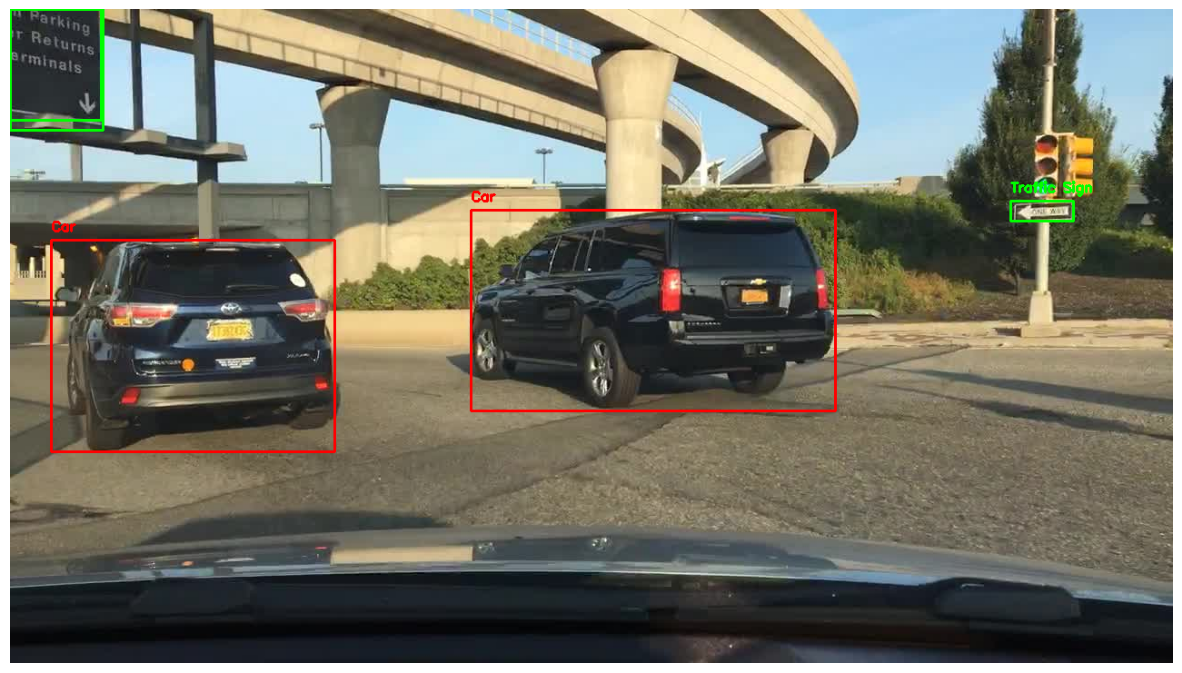

In [ ]:
image_path = Path(path) / "bdd100k/images/train/0000f77c-6257be58.jpg"
label_path = Path(path) / "bdd100k/labels/train/0000f77c-6257be58.txt"
visualize_labels(image_path, label_path)

In [30]:
path

'/root/.cache/kagglehub/datasets/paulmaxencebaraton/bdd100k-for-yolov5/versions/2'

In [51]:
import shutil

# Path to the directory you want to remove
dir_path = "/content/yolov5"

# Remove the directory and its contents
shutil.rmtree(dir_path)
print(f"Directory '{dir_path}' has been removed.")


Directory '/content/yolov5' has been removed.


In [ ]:
process_dataset(
    dataset_path="/root/.cache/kagglehub/datasets/paulmaxencebaraton/bdd100k-for-yolov5/versions/2/bdd100k",
    output_path="/content/Output_Data"
)

Starting preprocessing pipeline...

Processing training data...
Verifying train image-label pairs...


100%|██████████| 69863/69863 [04:52<00:00, 238.68it/s]


Found 69863 valid train image-label pairs
Filtering intersection scenes...


100%|██████████| 69863/69863 [00:04<00:00, 17204.94it/s]


Found 56605 intersection scenes

Processing 56605 training scenes...


100%|██████████| 56605/56605 [08:01<00:00, 117.54it/s]


Successfully processed 56605/56605 training scenes

Processing validation data...
Verifying val image-label pairs...


100%|██████████| 10000/10000 [00:49<00:00, 203.29it/s]


Found 10000 valid val image-label pairs
Filtering intersection scenes...


100%|██████████| 10000/10000 [00:00<00:00, 25506.89it/s]


Found 8135 intersection scenes

Processing 4067 validation scenes...


100%|██████████| 4067/4067 [00:32<00:00, 125.79it/s]


Successfully processed 4067/4067 validation scenes

Processing 4068 test scenes...


100%|██████████| 4068/4068 [00:32<00:00, 123.97it/s]


Successfully processed 4068/4068 test scenes

Preprocessing completed!


True

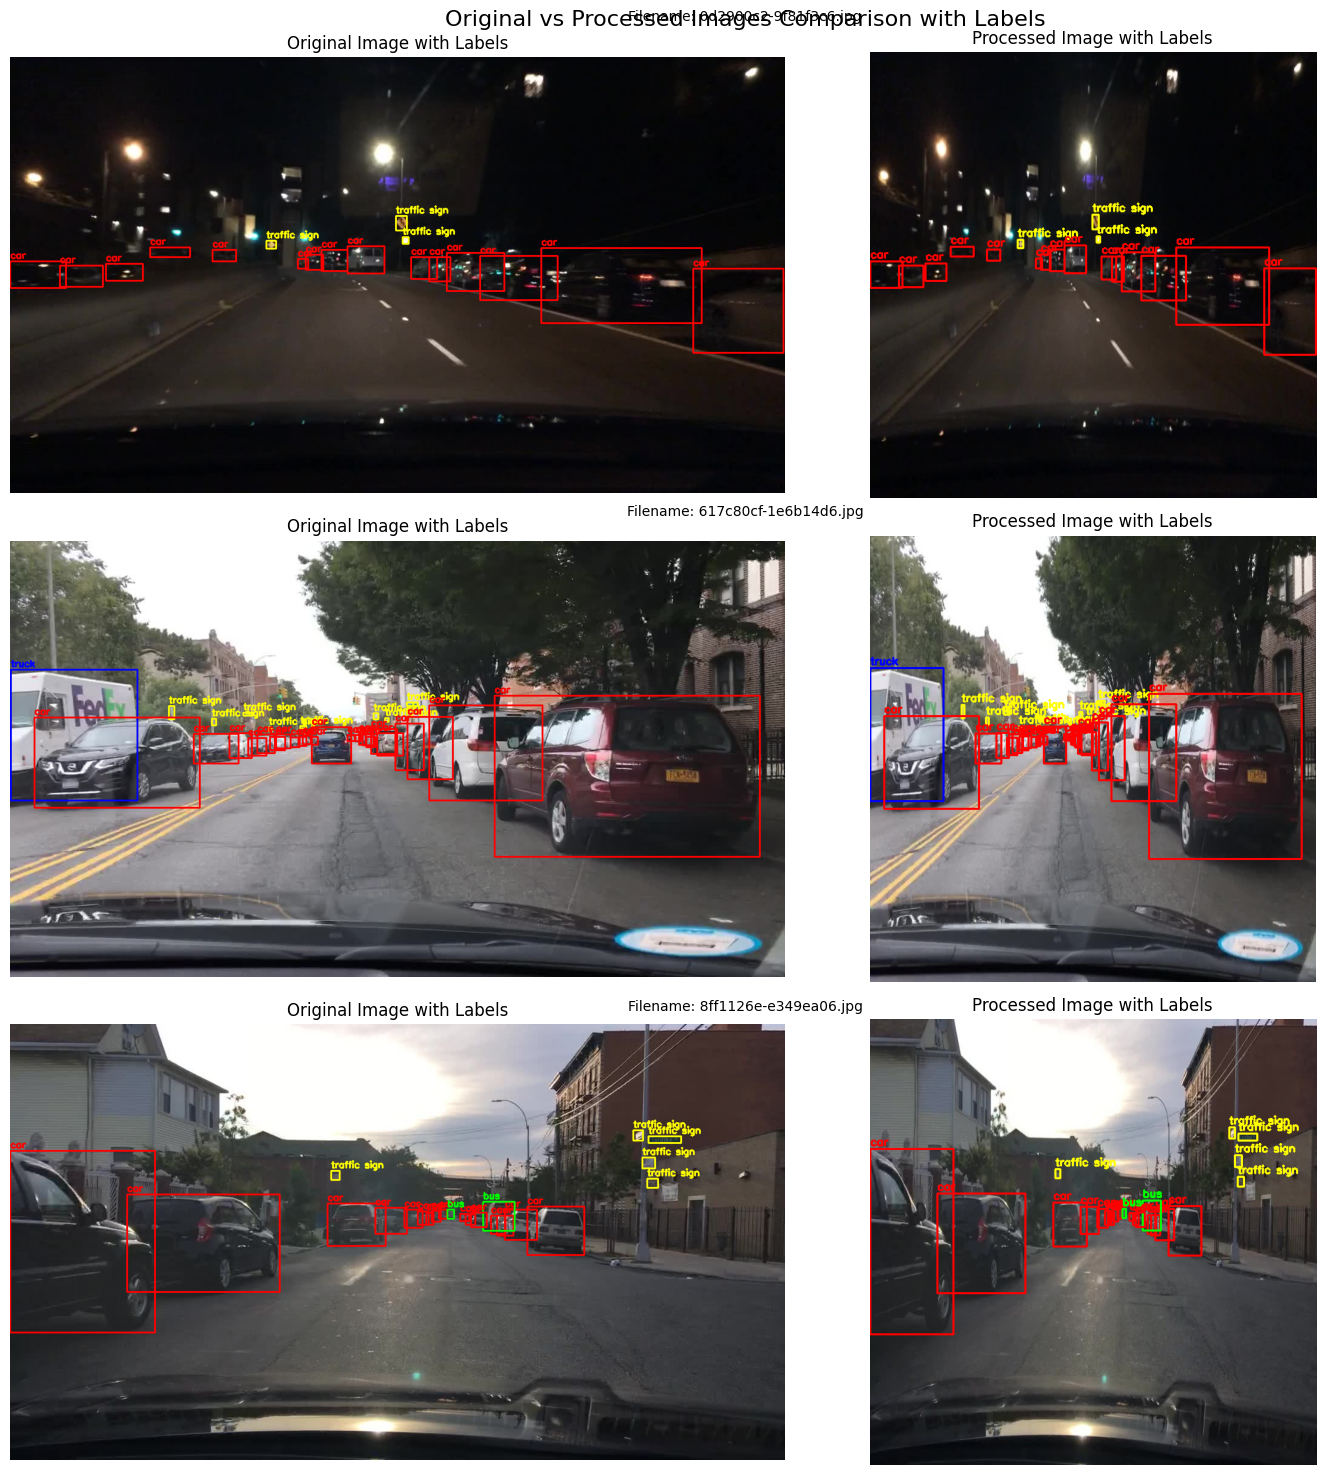


Statistics for 0d2900c2-9f81f3c6.jpg:
Original image shape: (720, 1280, 3)
Processed image shape: (640, 640, 3)
Original image mean intensity: 23.22
Processed image mean intensity: 23.14

Statistics for 617c80cf-1e6b14d6.jpg:
Original image shape: (720, 1280, 3)
Processed image shape: (640, 640, 3)
Original image mean intensity: 100.68
Processed image mean intensity: 100.60

Statistics for 8ff1126e-e349ea06.jpg:
Original image shape: (720, 1280, 3)
Processed image shape: (640, 640, 3)
Original image mean intensity: 87.36
Processed image mean intensity: 87.29


In [ ]:
compare_images(
    original_dir=f"{path}/bdd100k",
    processed_dir="/content/Output_Data/train/images",
    num_samples=3
)

In [53]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 17067, done.
remote: Counting objects: 100% (45/45), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 17067 (delta 24), reused 28 (delta 12), pack-reused 17022 (from 1)
Receiving objects: 100% (17067/17067), 15.68 MiB | 26.41 MiB/s, done.
Resolving deltas: 100% (11714/11714), done.


In [54]:
%cd yolov5

/content/yolov5


In [55]:
!pip install -r requirements.txt

In [ ]:
!python train.py --img 640 --batch 64 --epochs 25 --data /content/custom_data.yaml --weights yolov5s.pt --save-period 1

Streaming output truncated to the last 5000 lines.
       5/24        12G    0.04545     0.0654   0.007238       1399        640:   5% 46/885 [01:28<27:07,  1.94s/it]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
       5/24        12G    0.04544    0.06544   0.007237       1491        640:   5% 47/885 [01:31<29:09,  2.09s/it]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
       5/24        12G    0.04543     0.0654   0.007232       1452        640:   5% 48/885 [01:32<23:52,  1.71s/it]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
       5/24        12G    0.04545 